In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
# load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [8]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


In [4]:
from tensorflow.keras import layers,models

In [ ]:
X_train[0]

In [9]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [11]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

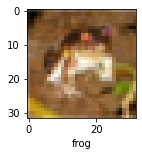

In [12]:
plot_sample(X_train, y_train, 0)

In [13]:
# Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and 
# each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

X_train = X_train/255
X_test = X_test/255

In [14]:
# Build simple artificial neural network for image classification
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid') # 10 categories dataset    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy', # for number classification use this loss
              metrics=['accuracy'])

              # for one hot encoded classification use this categorical_crossentropy

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5


2022-08-31 19:07:38.877257: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1563/1563 [==============================] - 26s 17ms/step - loss: 1.8142 - accuracy: 0.3532
Epoch 2/5
1563/1563 [==============================] - 26s 17ms/step - loss: 1.6251 - accuracy: 0.4260
Epoch 3/5
1563/1563 [==============================] - 26s 17ms/step - loss: 1.5435 - accuracy: 0.4583
Epoch 4/5
1563/1563 [==============================] - 27s 17ms/step - loss: 1.4812 - accuracy: 0.4785
Epoch 5/5
1563/1563 [==============================] - 26s 17ms/step - loss: 1.4338 - accuracy: 0.4959


In [15]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 2s 7ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.53      0.60      0.56      1000
           1       0.66      0.58      0.62      1000
           2       0.32      0.39      0.35      1000
           3       0.39      0.24      0.30      1000
           4       0.30      0.65      0.40      1000
           5       0.46      0.31      0.37      1000
           6       0.49      0.56      0.52      1000
           7       0.69      0.34      0.46      1000
           8       0.64      0.58      0.61      1000
           9       0.62      0.47      0.53      1000

    accuracy                           0.47     10000
   macro avg       0.51      0.47      0.47     10000
weighted avg       0.51      0.47      0.47     10000



In [16]:
# imporove performance of model using CNN
# Now let us build a convolutional neural network to train our images

cnn = models.Sequential([

    # cnn
    # convolutional neural network is for detecting the features of the image
    layers.Conv2D(filters=32, kernel_size=(3, 3),#filtersize
    activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)), #purpose of pooling layer is to progressively 
    #reduce the spatial size of the input image, so that number of computations in the network are reduced.
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
# softmax vs sigmoid 

'''
Sigmoid:
lets say probability of 2 class
1: .90
2: .85

Softmax: Normalizes
1: .90
2: .85

1: .90/(.90+.85)
2: .85/(.90+.85)
'''

In [17]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.4895 - accuracy: 0.4664
Epoch 2/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.1386 - accuracy: 0.6010
Epoch 3/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.0109 - accuracy: 0.6498
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9241 - accuracy: 0.6801
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8638 - accuracy: 0.7006
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8154 - accuracy: 0.7182
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7666 - accuracy: 0.7344
Epoch 8/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7254 - accuracy: 0.7504
Epoch 9/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6887 - accuracy: 0.7613
Epoch 10/10
1563/1563 [==============================] - 12s 8ms/step - l

In [20]:
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 3ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.62      0.69      1000
           1       0.84      0.81      0.82      1000
           2       0.56      0.59      0.58      1000
           3       0.50      0.55      0.52      1000
           4       0.64      0.62      0.63      1000
           5       0.68      0.52      0.59      1000
           6       0.70      0.82      0.76      1000
           7       0.70      0.79      0.74      1000
           8       0.78      0.83      0.81      1000
           9       0.78      0.80      0.79      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



In [21]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9203 - accuracy: 0.6946


[0.9202882051467896, 0.694599986076355]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

In [23]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [24]:
y_pred = cnn.predict(X_test)
y_pred[0]

313/313 [==============================] - 1s 3ms/step


array([2.5724526e-04, 4.8324079e-03, 8.1421237e-04, 9.2053133e-01,
       9.0953436e-05, 4.8115719e-03, 1.1231679e-02, 1.3696235e-05,
       5.7378456e-02, 3.8356986e-05], dtype=float32)

In [25]:
y_classes = [np.argmax(element) for element in y_pred]

In [26]:
classes[y_classes[0]]

'cat'

In [28]:
y_test[0]

3